### Machine Learning Project
- https://zhuanlan.zhihu.com/p/478340405

### Evaluation metrics
https://zhuanlan.zhihu.com/p/476927099

### Cross validation
https://zhuanlan.zhihu.com/p/471342052

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
data = datasets.fetch_openml(
'mnist_784',
version=1,
return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


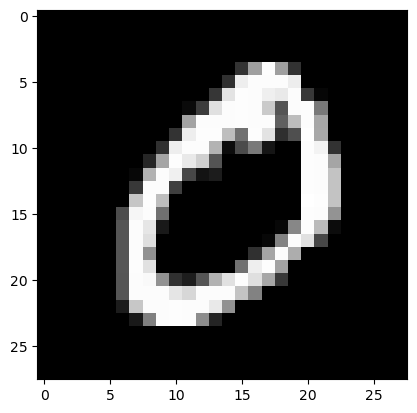

In [10]:
single_image = np.reshape(pixel_values.iloc[1, :].values,(28, 28))
plt.imshow(single_image, cmap='gray')

In [17]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

In [18]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets.iloc[:3000].values)),
columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

/tmp/ipykernel_168558/1075787502.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)


In [22]:
tsne_df

,x,y,targets
0,20.515184,-11.026083,5
1,57.560905,0.121864,0
2,-0.679077,-54.268143,4
3,-41.528664,11.559952,1
4,-10.032307,-33.632420,9
...,...,...,...
2995,-35.470184,-24.492340,7
2996,52.467827,-3.201818,0
2997,-30.010117,-13.070750,9
2998,-29.661884,45.717960,1


/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


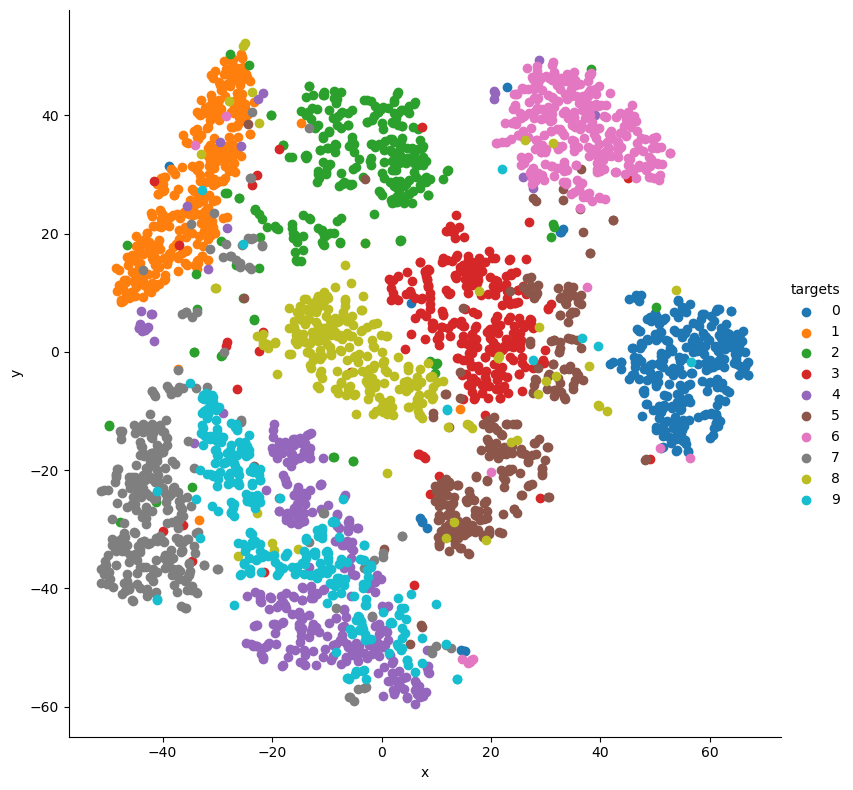

In [21]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()

In [25]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
 
X_std = StandardScaler().fit_transform(pixel_values.iloc[:3000, :]) 
X_pca = PCA(n_components=2).fit_transform(X_std) 
X_pca = np.vstack((X_pca.T, targets.iloc[:3000].values)).T 
 
df_pca = pd.DataFrame(X_pca, columns=['x', 'y', 'targets']) 
df_pca.head()


,x,y,targets
0,-0.532740,-4.139968,5.0
1,9.376174,-6.028672,0.0
2,1.743523,9.761670,4.0
3,-7.191024,-3.778970,1.0
4,-5.214775,3.663597,9.0


/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


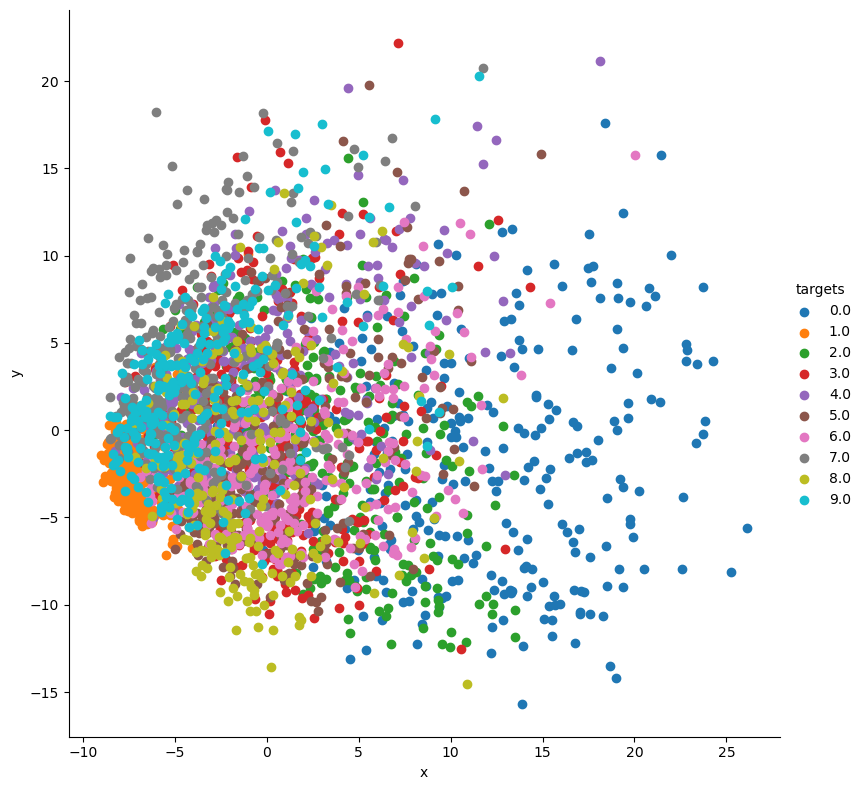

In [26]:
grid = sns.FacetGrid(df_pca, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()

## TSNE 降维
- t-SNE可视化效果更好，但是计算量大
- 用t分布的原因：相似度低的点，低维空间中t分布的距离大于正态分布，而对于相似度高的点，距离更近。所以在降维之后，同一集群中的点在一起更近，而不同集群中的点距离更远，结果更优。相比于正太分布，t 分布更扁，相同的相似度在坐标上会更分散，所以更清晰便于观察。
- > https://www.bilibili.com/video/BV1F5411P7JG/?spm_id_from=333.999.0.0&vd_source=77ad538e81a4cf20b61215dfcbc1e4fc
- > https://zhuanlan.zhihu.com/p/327699974

# Corss Validation


In [27]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")

In [30]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [31]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5,
}
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [32]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [33]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected
# for training
df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

In [37]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics
# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=7)
# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol']
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [38]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(
df_train.quality, train_predictions
)
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions
)

In [39]:
train_accuracy, test_accuracy

(0.802, 0.5792988313856428)

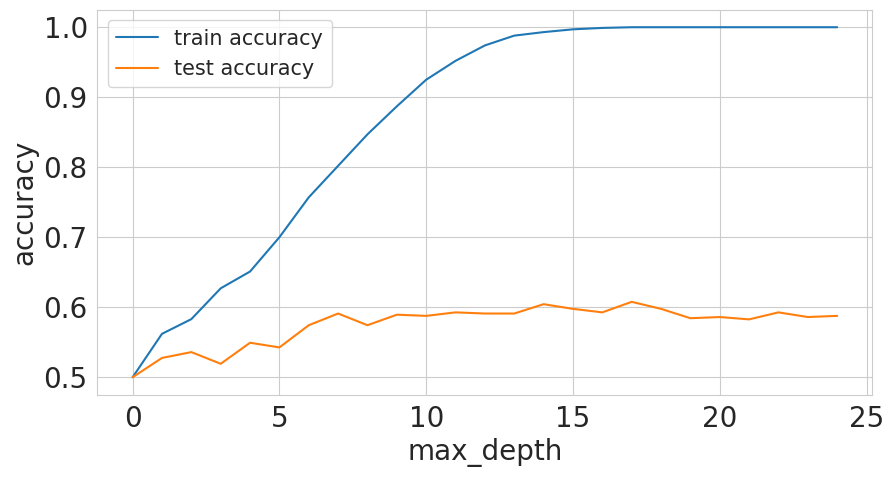

In [40]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline
# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]
# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    # columns/features for training
    # note that, this can be done outside
    # the loop
    cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
    ]
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
    )
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

# Overfitting
- 神经网络中，尤其是数据集很小，网络很大，会发生训练集和测试集很快到了最小loss，之后训练的loss可能继续减小，但是测试loss反而增加。
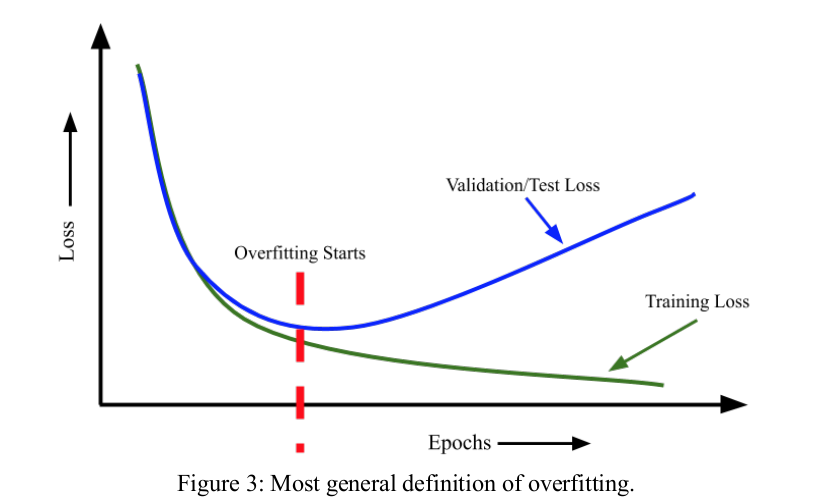

### k-fold Validation

In [42]:
from sklearn import model_selection
model_selection.KFold(n_splits=5)

KFold(n_splits=5, random_state=None, shuffle=False)

In [65]:
import pandas as pd
from sklearn import model_selection

df = pd.read_csv("winequality-red.csv")
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)
kf = model_selection.KFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.0,0.530,0.49,1.9,0.171,6.0,25.0,0.99750,3.27,0.61,9.4,6,0
1,9.2,0.580,0.20,3.0,0.081,15.0,115.0,0.99800,3.23,0.59,9.5,5,0
2,12.0,0.280,0.49,1.9,0.074,10.0,21.0,0.99760,2.98,0.66,9.9,7,0
3,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5,0
4,7.0,0.975,0.04,2.0,0.087,12.0,67.0,0.99565,3.35,0.60,9.4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.5,0.580,0.00,2.2,0.096,3.0,13.0,0.99557,3.62,0.62,11.5,4,4
1595,8.0,0.580,0.16,2.0,0.120,3.0,7.0,0.99454,3.22,0.58,11.2,6,4
1596,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.99630,3.25,0.63,9.2,5,4
1597,9.3,0.400,0.49,2.5,0.085,38.0,142.0,0.99780,3.22,0.55,9.4,5,4


Text(0, 0.5, 'count')

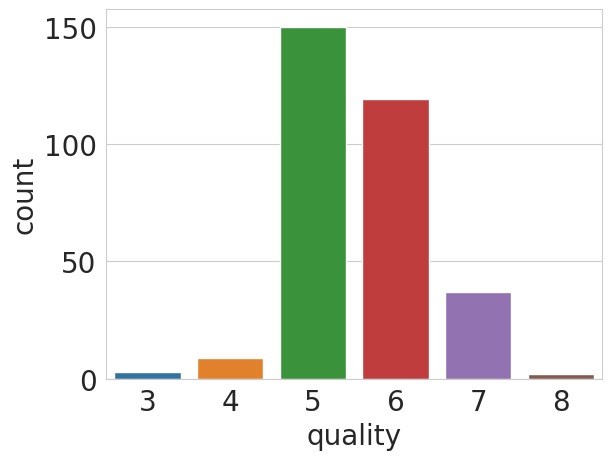

In [66]:
b = sns.countplot(x='quality', data=df.loc[df['kfold'] == 0])
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

Text(0, 0.5, 'count')

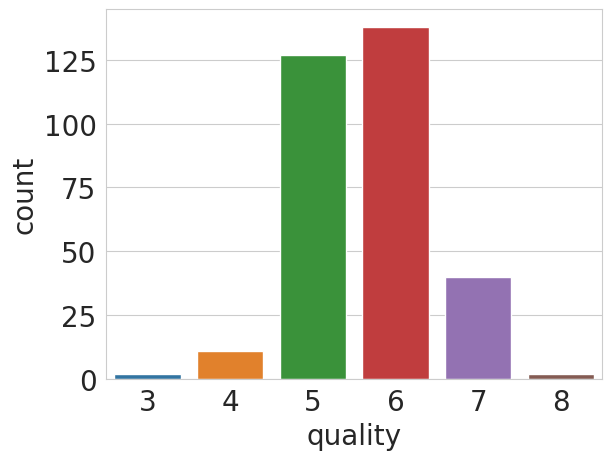

In [67]:
b = sns.countplot(x='quality', data=df.loc[df['kfold'] == 1])
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

### stratified k-fold Validation
- 当90%正例10%负例直接用k-fold，可能导致所有负例到同一fold里面
- 要在每一折中保持这个比例，则用stratified k-fold
- The rule is simple. If it’s a standard classification problem, choose stratified k-fold
blindly.

In [46]:
df = pd.read_csv("winequality-red.csv")
df['kfold'] = -1
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,-1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,-1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,-1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,-1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,-1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,-1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,-1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,-1


In [52]:
import pandas as pd
from sklearn import model_selection

df = pd.read_csv("winequality-red.csv")
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)
kf = model_selection.StratifiedKFold(n_splits=5)
y = df.quality.values
for fold, (trn_, val_) in enumerate(kf.split(X=df, y=y)):
    df.loc[val_, 'kfold'] = fold

In [60]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.2,0.200,0.43,2.5,0.076,31.0,51.0,0.99672,3.53,0.81,10.4,6,0
1,8.8,0.550,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9,6,0
2,7.5,0.755,0.00,1.9,0.084,6.0,12.0,0.99672,3.34,0.49,9.7,4,0
3,7.9,0.350,0.21,1.9,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5,0
4,7.0,0.655,0.16,2.1,0.074,8.0,25.0,0.99606,3.37,0.55,9.7,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,9.2,0.590,0.24,3.3,0.101,20.0,47.0,0.99880,3.26,0.67,9.6,5,4
1595,11.2,0.660,0.24,2.5,0.085,16.0,53.0,0.99930,3.06,0.72,11.0,6,4
1596,9.8,0.500,0.34,2.3,0.094,10.0,45.0,0.99864,3.24,0.60,9.7,7,4
1597,6.9,0.500,0.04,1.5,0.085,19.0,49.0,0.99580,3.35,0.78,9.5,5,4


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
290,8.6,0.635,0.68,1.8,0.403,19.0,56.0,0.99632,3.02,1.15,9.3,5,1
294,7.0,0.400,0.32,3.6,0.061,9.0,29.0,0.99416,3.28,0.49,11.3,7,1
295,8.8,0.400,0.40,2.2,0.079,19.0,52.0,0.99800,3.44,0.64,9.2,5,1
296,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5,1
297,7.5,0.580,0.03,4.1,0.080,27.0,46.0,0.99592,3.02,0.47,9.2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,8.4,0.670,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2,4,1
693,10.2,0.230,0.37,2.2,0.057,14.0,36.0,0.99614,3.23,0.49,9.3,4,1
694,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1
766,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8,1


Text(0, 0.5, 'count')

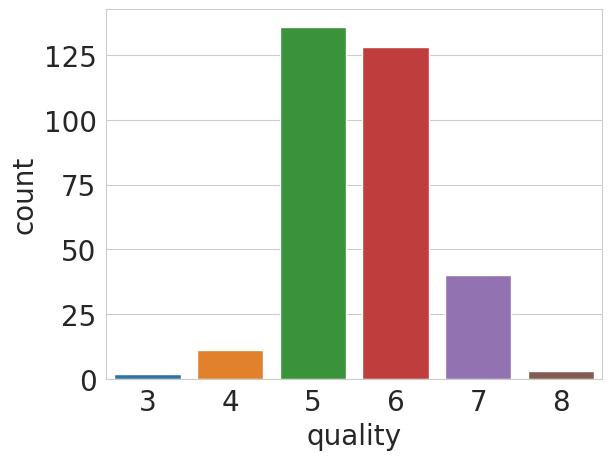

In [63]:
b = sns.countplot(x='quality', data=df.loc[df['kfold'] == 0])
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

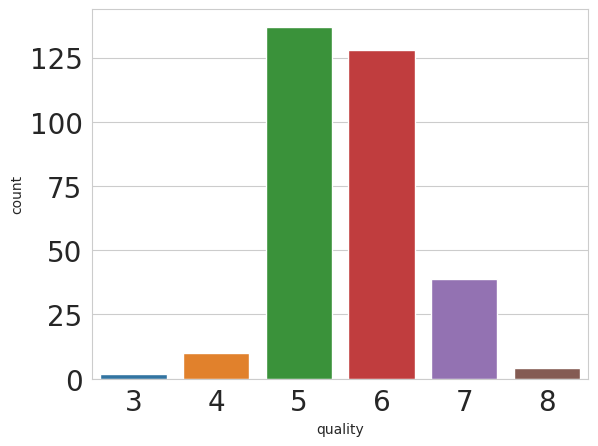

In [64]:
b = sns.countplot(x='quality', data=df.loc[df['kfold'] == 1])

### hold-out based validation
？

自助法（Bootstrap）部分场景下，数据量较少，很难通过已有的数据来估计数据的整体分布（因为数据量不足时，计算的统计量反映不了数据分布），这时可以使用 Bootstrap 自助法。Bootstrap 是一种用小样本估计总体值的一种非参数方法，在进化和生态学研究中应用十分广泛。Bootstrap通过有放回抽样生成大量的伪样本，通过对伪样本进行计算，获得统计量的分布，从而估计数据的整体分布。有了有效的模型评估方法，我们还需要量化的度量标准来精准评估与判断。下文归纳了分类与回归问题的各类评估指标。

作者：颜玄墨
链接：https://zhuanlan.zhihu.com/p/554539874
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

作者：热血老男孩
链接：https://zhuanlan.zhihu.com/p/564057495
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

1.留出法 留出法（hold-out）直接将数据集D分为两个互斥的集合，其中一个集合做为训练集S，另一个做为测试集T，在S上训练完成后用T来评估其测试误差，做为对泛化误差的估计。常见的做法是将大约2/3~4/5的样本用于训练，剩余样本用于测试

2.交叉验证法 交叉验证法（cross validation）先将数据集D划分为K个大小相似的互斥子集，每个子集都是通过分层采样得到，以尽可能保持数据分布的一致性；然后每次用k-1个子集做训练集，余下的子集做测试集，这样一共可以得到k组训练集/测试集，从而可以进行k次训练和测试，最终返回k次训练的均值。 通常把交叉验证又叫做k折交叉验证，如k取10，则是10折交叉验证； 留一法（leave-One-Out）：特殊的，当数据集D中有m个样本，令k=m，即每个子集只有一个样本，也即每次只留出一个做为测试集，这样的方法叫做留一法。

3.自助法 引言：我们希望评估的是在数据集D上训练出的模型，但是留出法和交叉验证法都保留了一部分样本用于测试，数据集规模要小于原来的规模，因此会引入一些因训练样本规模不同而导致的估计偏差，留一法受训练样本规模影响较小，但是计算复杂度太高了（训练集很小时还行）。自助法（bootstrapping），对于一个拥有m个样本的数据集D，有放回的进行采样m次，就得到了一个同等规模的D*，显然D*中有的样本会出现多次，有的样本一次都不会出现，可以简单估计，样本在m次采样中始终不被采到的概率是 （1-1/m）^m，取极限得到=1/e =0.368；即 通过自助法大约有1/3的数据被用来做测试集 实际评估的模型与期望评估的模型都是用m个训练样本，而我们仍有1/3的没在训练集出现的数据用于测试，这样的测试结果也称作包外估计（out-of-bagestimate）。优缺点优点：自助法在数据集较小，难以有效划分训练集测试集时很有用；此外自助法能从初始数据集中产生多个不同的训练集，这对集成学习等方法很有用处。缺点：自助法产生的数据集改变了原来数据集的样本分布，这会引入估计偏差，因此，在初始数据量足够时，留出法和交叉验证法更常用一些。

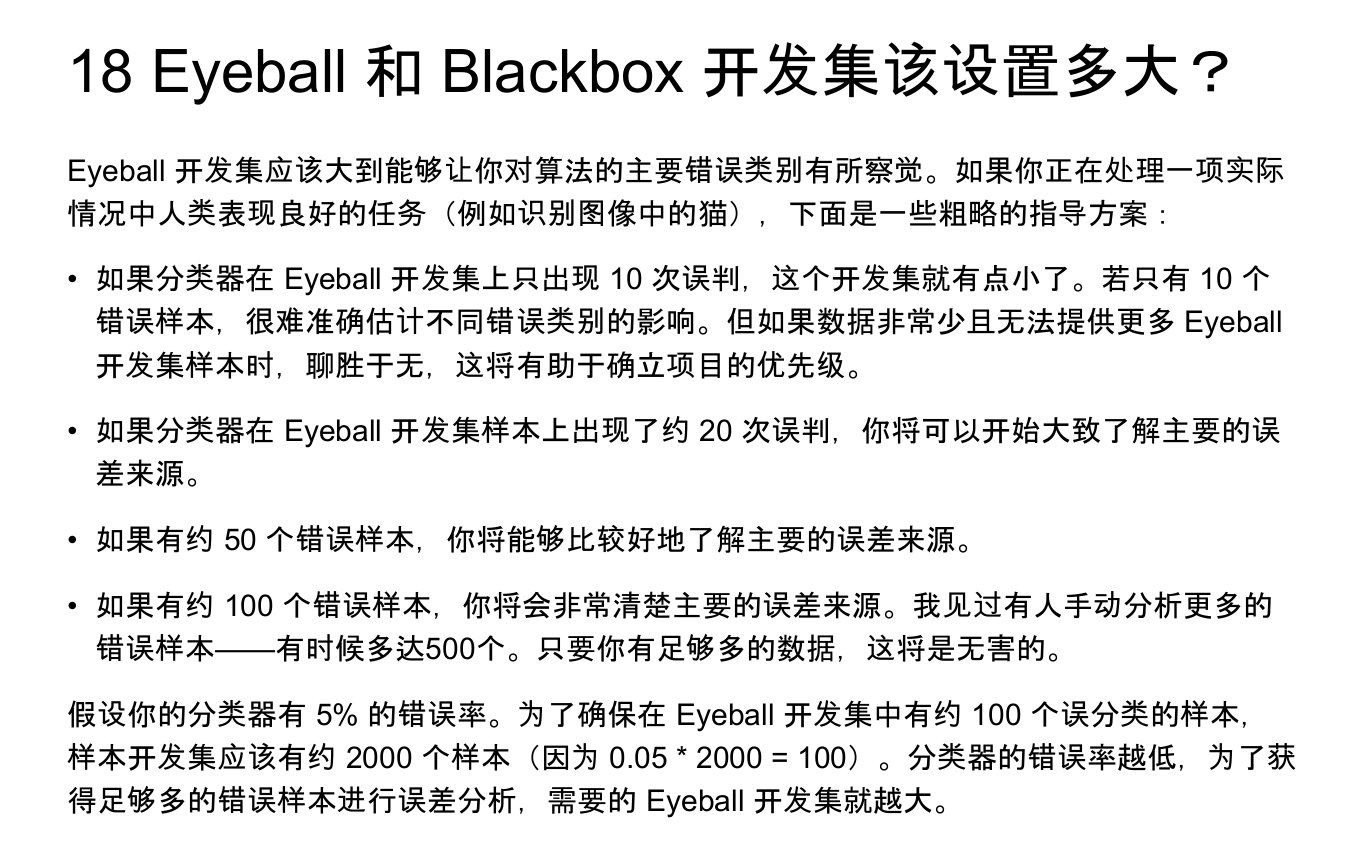

### GroupKFold.
- 比如有通过患者的皮肤图片判断是否是皮肤癌的问题，同一个患者可能有多个图片，因此，同一个患者的图片只能出现在测试集或者只能在训练集。因此引入了groupKFold

### Evaluation metrics
- 准确率： 预测的准确值/总值 问题：当数据是skewed data时，比如positive:negetive = 9:1, 只要预测全部对，就能得到90%的准确率。因此准确率只适合均匀分布的数据
- TP/TN FP/FN, 预测的对不对是true or false, 类的划分是预测的是positive or negative. 正例预测对了是TP, 预测的是负例且对了是TN
- Precision 预测为正例的结果中，为预测为正例中正确的有多少 TP/TP+FP
- Recall 实际上所有的正例中，预测对了的有多少， TP/TP+FN , FN就是实际上是正例，但预测错了。因此为FN.

In [69]:
def accuracy(y_true, y_pred):
    acc_count = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            acc_count += 1
    return acc_count/len(y_true)

In [70]:
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)
# accuracy(l1, l2)

0.625

In [82]:
def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt != yp and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt != yp and yp == 0:
            fn += 1
    return fn

In [83]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
true_positive(l1, l2), false_positive(l1, l2), false_negative(l1, l2), true_negative(l1, l2)

(2, 1, 2, 3)

In [ ]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

Let’s say we make a new model on the new skewed dataset and our model correctly
identified 80 non-pneumothorax out of 90 and 8 pneumothorax out of 10. Thus, we
identify 88 images out of 100 successfully. The accuracy is, therefore, 0.88 or 88%.

Thus, we have:
TP : 8
TN: 80
FP: 10
FN: 2
So, our precision is 8 / (8 + 10) = 0.444.

In [84]:
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    return tp/(tp+fp)

def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    return tp/(tp+fn)

recall(l1, l2), precision(l1, l2)

(0.5, 0.6666666666666666)

### TPR or True Positive Rate 真阳性率，实际有病，并判断成有病
TPR = TP / (TP + FN) = recall
TPR or recall is also known as sensitivity.

### FPR or False Positive Rate 假阳性率， 无病判断成有病
FPR = FP / (TN + FP)
FPR is known as specificity

In [86]:
def tpr(y_true, y_pred):
    return recall(y_true, y_pred)

def fpr(y_true, y_pred):
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp/(fp+tn)


tpr_list = []
fpr_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

for x_threshold, x_tpr, x_fpr in zip(thresholds, tpr_list, fpr_list):
    print(x_threshold, x_tpr, x_fpr)

0 1.0 1.0
0.1 1.0 0.9
0.2 1.0 0.7
0.3 0.8 0.6
0.4 0.8 0.3
0.5 0.8 0.3
0.6 0.8 0.2
0.7 0.6 0.1
0.8 0.6 0.1
0.85 0.4 0.1
0.9 0.4 0.0
0.99 0.2 0.0
1.0 0.0 0.0


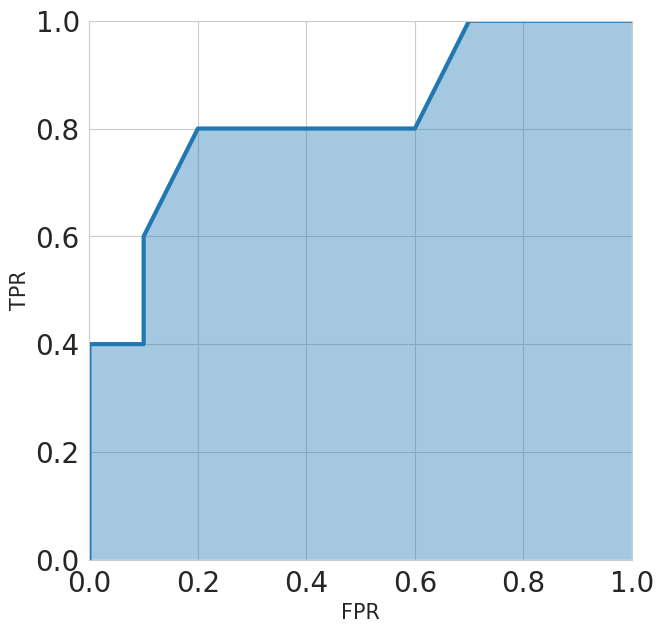

In [87]:
## Receiver Operating Characteristic (ROC)
## This metric is known as the Area Under ROC Curve or Area Under Curve or just simply AUC.
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [88]:
from sklearn import metrics
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

### AUC
AUC 一般是在0.5 - 1之间，低于0.5只要颠倒一下划分的类就行了。越高越好
AUC的意义： 比如AUC为0.85，你随机挑选一张有病的图片，和一张没病照片，有病照片输出的概率排在没病照片前面的概率是0.85

### ROC
ROC 帮助找到适合的threshold，用这个threshold来根据输出的概率判断是正例类还是负例类
AUC is a widely used metric for skewed binary classification tasks in the industry

log loss

In [89]:
import numpy as np
def log_loss(y_true, y_proba):
    # define an epsilon value
    # this can also be an input
    # this value is used to clip probabilities
    epsilon = 1e-15
    # initialize empty list to store
    # individual losses
    loss = []
    # loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        # adjust probability
        # 0 gets converted to 1e-15
        # 1 gets converted to 1-1e-15
        # Why? Think about it!
        yp = np.clip(yp, epsilon, 1 - epsilon)
        # calculate loss for one sample
        temp_loss = - 1.0 * (
        yt * np.log(yp)
        + (1 - yt) * np.log(1 - yp)
        )
        # add to loss list
        loss.append(temp_loss)
    # return mean loss over all samples
    return np.mean(loss)

In [90]:
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
log_loss(y_true, y_proba)

0.49882711861432294

In [91]:
from sklearn import metrics
metrics.log_loss(y_true, y_proba)

0.49882711861432294

作者：玉来愈宏
链接：https://zhuanlan.zhihu.com/p/659617924
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

5.  对数损失的设计思想5.1概率预测与只关心分类结果的损失函数（如0-1损失）不同，对数损失关心模型预测的概率。这使我们能够更准确地衡量模型的不确定性和可靠性。5.2 惩罚机制对数损失对于那些预测错误且置信度高的预测（即错误预测的概率接近0或1）会给予更大的惩罚。这有助于模型避免过于自信。5.3 信息论背景对数损失是交叉熵损失的一个特例，用于衡量两个概率分布之间的“距离”或“相似度”。在分类问题中，我们通常有一个离散的真实标签分布（通常是一个独热编码向量）和一个模型预测的概率分布，对数损失就是衡量这两者之间相似度的一种方法。6.对数损失的优缺点6.1 优点（1）概率解释：Log Loss 不仅考虑了模型的预测准确度，还考虑了预测概率，这有助于了解模型的不确定性。（2）可微分：与 MSE（均方差） 类似，Log Loss 是一个可微分函数，适用于梯度下降等优化算法。6.2缺点（1）敏感于异常值：如果模型对一个实例预测的概率非常错误（接近 0 或 1），Log Loss 会非常高。比如说，某个样本真实标签为1，而预测概率为0.001（接近于0），那么这个样本带来的对数损失就比较大：1 * np.log(1 / 0.001) = 6.91（2）数值不稳定：因为它涉及到对数运算，在极值情况下，需要注意数值稳定性。

### multi-class classification
多分类问题

In [92]:
import numpy as np
def macro_precision(y_true, y_pred):
    """
    Function to calculate macro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: macro precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # initialize precision to 0
    precision = 0
    # loop over all classes
    for class_ in range(num_classes):
    # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate true positive for current class
        tp = true_positive(temp_true, temp_pred)
        # calculate false positive for current class
        fp = false_positive(temp_true, temp_pred)
        # calculate precision for current class
        temp_precision = tp / (tp + fp)
        # keep adding precision for all classes
        precision += temp_precision
    # calculate and return average precision over all classes
    precision /= num_classes
    return precision

In [93]:
import numpy as np
def micro_precision(y_true, y_pred):
    """
    Function to calculate micro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: micro precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)
        # calculate false positive for current class
        # and update overall tp
        fp += false_positive(temp_true, temp_pred)
    # calculate and return overall precision
    precision = tp / (tp + fp)
    return precision

In [94]:
from collections import Counter
import numpy as np
def weighted_precision(y_true, y_pred):
    """
    Function to calculate weighted averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: weighted precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # create class:sample count dictionary
    # it looks something like this:
    # {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)
    # initialize precision to 0
    precision = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate tp and fp for class
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        # calculate precision of class
        temp_precision = tp / (tp + fp)
        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precision
        # add to overall precision
        precision += weighted_precision
    # calculate overall precision by dividing by
    # total number of samples
    overall_precision = precision / len(y_true)
    return overall_precision

In [97]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
(macro_precision(y_true, y_pred),
metrics.precision_score(y_true, y_pred, average="macro"),
micro_precision(y_true, y_pred),
metrics.precision_score(y_true, y_pred, average="micro"),
weighted_precision(y_true, y_pred),
metrics.precision_score(y_true, y_pred, average="weighted"))

(0.3611111111111111,
 0.3611111111111111,
 0.4444444444444444,
 0.4444444444444444,
 0.39814814814814814,
 0.39814814814814814)

In [ ]:
from collections import Counter
import numpy as np
def weighted_f1(y_true, y_pred):
    """
    Function to calculate weighted f1 score
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: weighted f1 score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # create class:sample count dictionary
    # it looks something like this:
    # {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)
    # initialize f1 to 0
    f1 = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate precision and recall for class
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)
        # calculate f1 of class
        if p + r != 0:
            temp_f1 = 2 * p * r / (p + r)
        else:
            temp_f1 = 0
        # multiply f1 with count of samples in class
        weighted_f1 = class_counts[class_] * temp_f1
        # add to f1 precision
        f1 += weighted_f1
    # calculate overall F1 by dividing by
    # total number of samples
    overall_f1 = f1 / len(y_true)
    return overall_f1

### confusion matrix
Sometimes, people also prefer calling FP as Type-I error and FN as Type-II error.

作者：deephub
链接：https://zhuanlan.zhihu.com/p/456227363
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

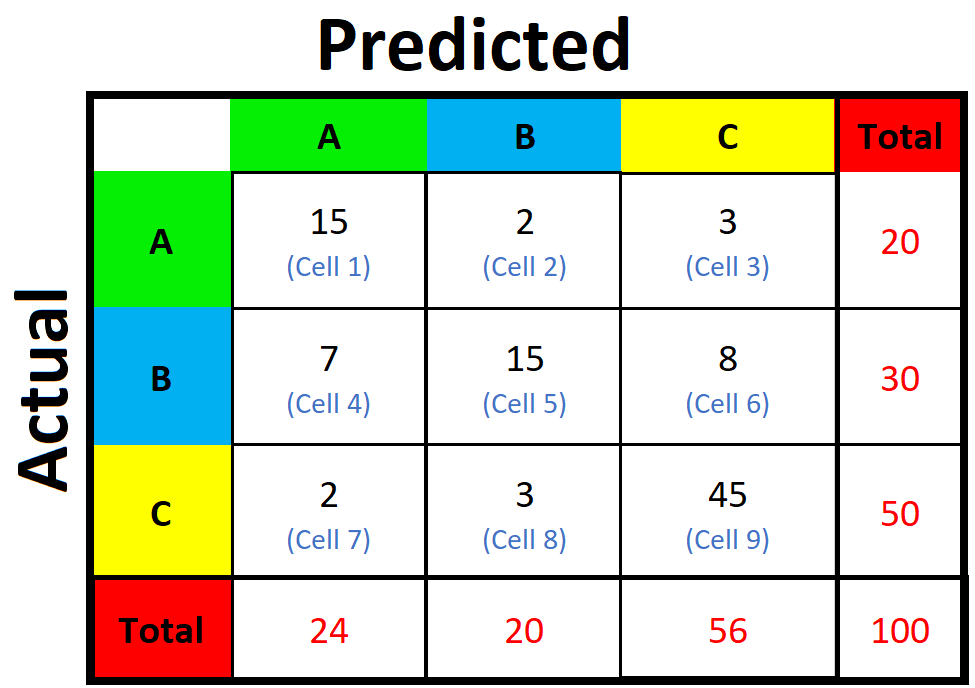

我们将尝试计算 A 类的TP(True Positive)、FP(False Positive)、False Positive 和 FN(False Negative)的值
- TP TruePositive(A)：它告诉实际值和预测值相同。 A 类的TP只不过是实际值和预测值相同，这意味着单元格 1 的值为 15。
- FP FalsePositive(A)：它告诉实际值是负的，在我们的例子中它是 B 类和 C 类，但模型预测它是正的，即 A 类。它是除了 TP 值之外的相应列的值的相加。
FalsePositive(A) = (单元格 4 + 单元格 7)：7+2=9
- TN TrueNegative(A)：实际值和预测值的含义相同，对于 A：B 类和 C 类是负分类。 它是所有非A行和列的值相加。TrueNegative(A) = (单元格 5 + 单元格 6 + 单元格 8 + 单元格 9)：15 + 8 +3 + 45= 71
- FN FalseNegative(A)：实际值在我们的例子中是正的，它是 A 类，但模型预测它是负的，即 B 类和 C 类。可以通过除 TP 值之外的相邻行来计算的。FalseNegative(A) = (单元格 2 + 单元格 3)： 2 + 3= 5

常用指标现在是计算 A 类的 Precision、Recall 和 Accuracy 的时候了。精度Precision：“模型认为正确且确实是正确的样本占模型认为正确的所有样本的概率”Precision (A) = 正确预测 / 总预测 = 15/24 = 0.625召回Recall ：“模型认为正确且确实是正确的样本占模型认为正确的所有样本的概率”Recall (A)= 正确分类 / 总实际值 = 15/20 = 0.75正确率Accuracy ：被分对的样本数除以所有的样本数 Accuracy (A) = 正确分类的总数 / 实际分类的总数 = （15 + 15+ 45）/100 = 0.75同样，可以计算 B 类和 C 类的 TP、FP、FN、TN、Precision、Recall


Text(0.5, 53.249999999999986, 'Predicted Labels')

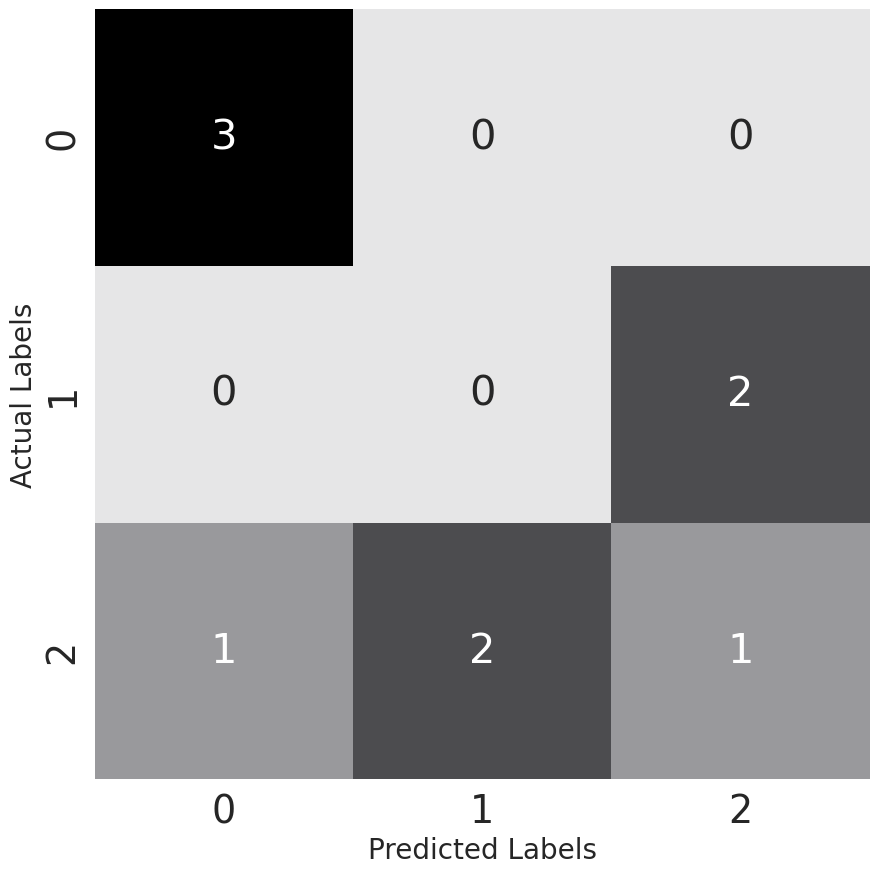

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)
# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0,
as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)
# precision = metrics.precision_score(y_true, y_pred, average='micro')
# recall = metrics.recall_score(y_true, y_pred, average='micro')

### multi-label classification problem
- 比如一张图片中有很多物体，要检测出所有物体，那么这个图片就对应了多个标签

- Average precision at k (AP@k)
- Precision at k (P@k)
- Mean average precision at k (MAP@k)
- Log loss


In [99]:
def pk(y_true, y_pred, k):
    """
    This function calculates precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :param k: the value for k
    :return: precision at a given value k
    """
    # if k is 0, return 0. we should never have this
    # as k is always >= 1
    if k == 0:
        return 0
    # we are interested only in top-k predictions
    y_pred = y_pred[:k]
    # convert predictions to set
    pred_set = set(y_pred)
    # convert actual values to set
    true_set = set(y_true)
    # find common values
    common_values = pred_set.intersection(true_set)
    # return length of common values over k
    return len(common_values) / len(y_pred[:k])

In [100]:
def apk(y_true, y_pred, k):
    """
    This function calculates average precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: average precision at a given value k
    """
    # initialize p@k list of values
    pk_values = []
    # loop over all k. from 1 to k + 1
    for i in range(1, k + 1):
        # calculate p@i and append to list
        pk_values.append(pk(y_true, y_pred, i))
    # if we have no values in the list, return 0
    if len(pk_values) == 0:
        return 0
    # else, we return the sum of list over length of list
    return sum(pk_values) / len(pk_values)

In [101]:
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]

y_pred = [
    [0, 1, 2],
    [1],
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
]

for i in range(len(y_true)):
    for j in range(1, 4):
        print(
                f"""
                y_true={y_true[i]},
                y_pred={y_pred[i]},
                AP@{j}={apk(y_true[i], y_pred[i], k=j)}
                """
            )


                y_true=[1, 2, 3],
                y_pred=[0, 1, 2],
                AP@1=0.0
                

                y_true=[1, 2, 3],
                y_pred=[0, 1, 2],
                AP@2=0.25
                

                y_true=[1, 2, 3],
                y_pred=[0, 1, 2],
                AP@3=0.38888888888888884
                

                y_true=[0, 2],
                y_pred=[1],
                AP@1=0.0
                

                y_true=[0, 2],
                y_pred=[1],
                AP@2=0.0
                

                y_true=[0, 2],
                y_pred=[1],
                AP@3=0.0
                

                y_true=[1],
                y_pred=[0, 2, 3],
                AP@1=0.0
                

                y_true=[1],
                y_pred=[0, 2, 3],
                AP@2=0.0
                

                y_true=[1],
                y_pred=[0, 2, 3],
                AP@3=0.0
                

                y_true=[2, 3

### mapk
机器学习一般感兴趣的是所有sample的值，因此要算一下均值

In [ ]:
def mapk(y_true, y_pred, k):
    """
    This function calculates mean avg precision at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: mean avg precision at a given value k
    """
    # initialize empty list for apk values
    apk_values = []
    # loop over all samples
    for i in range(len(y_true)):
        # store apk values for every sample
        apk_values.append(apk(y_true[i], y_pred[i], k=k))
    # return mean of apk values list
    return sum(apk_values) / len(apk_values)

有一些其他的算apk的方法，这种方法考虑了prediction的排序


In [ ]:
import numpy as np
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the AP at k between two lists of
    items.
    Parameters
    ----------
    actual : list
    A list of elements to be predicted (order doesn't matter)
    predicted : list
    A list of predicted elements (order does matter)
    k : int, optional
    The maximum number of predicted elements
    Returns
    -------
    score : double
    The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0
    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)
    if not actual:
        return 0.0
    return score / min(len(actual), k)

### log loss for multi-label classification
- TODO
  
#### 以上就是所有分类问题的metric： binary, multi-class and multi-label classification metrics

### regression metrics
Error = True Value – Predicted Value
Absolute Error = Abs ( True Value – Predicted Value )
Squared Error = ( True Value – Predicted Value )2
RMSE = SQRT ( MSE )
Percentage Error = ( ( True Value – Predicted Value ) / True Value ) * 100

In [105]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    error = 0
    for y_t, y_p in zip(y_true, y_pred):
        error += abs(y_t-y_p)
    return error / len(y_true)

In [ ]:
def mean_squared_error(y_true, y_pred):
    error = 0
    for y_t, y_p in zip(y_true, y_pred):
        error += (y_t-y_p) * (y_t-y_p)
    return error / len(y_true)

In [ ]:
def mean_squared_log_error(y_true, y_pred):
    for yt, yp in zip(y_true, y_pred):
        # calculate squared log error
        # and add to error
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
    # return mean error
    return error / len(y_true)

In [ ]:
def mean_percentage_error(y_true, y_pred):
    error = 0
    for y_t, y_p in zip(y_true, y_pred):
        error += ((y_t - y_p) / y_t)*100.0 # y_t == 0?
    return error / len(y_true)

In [ ]:
import numpy as np
def mean_abs_percentage_error(y_true, y_pred):
    """
    This function calculates MAPE
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absolute percentage error
    """
    # initialize error at 0
    error = 0
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error
        # and add to error
        error += np.abs(yt - yp) / yt
    # return mean percentage error
    return error / len(y_true)

In [106]:
from sklearn import metrics
y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

metrics.mean_absolute_error(y_true, y_pred), mean_absolute_error(y_true, y_pred)

(0.6666666666666666, 0.6666666666666666)

MAE 比 MSE 对异常值更稳健，主要原因是在 MSE 中，通过平方误差，异常值在误差中得到更多的关注，并影响模型参数

### R2
让我们来看看另一个回归指标 R2R^2R^2（R平方），也称为 决定系数 (coefficient of determination)。简单地说，R2^2^2表示模型对数据的拟合程度。接近1.0的R方表示模型与数据吻合得很好，而接近0表示模型不太好。当模型只是做出荒谬的预测时，R2^2^2也可能是负的

### QWK
QWK测量两个 "评分 "之间的 "一致 "程度。评分可以是0到N的任何实数，预测也在同一范围内，一致性可以定义为这些评级之间的接近程度。因此，它适用于有N个不同类别的分类问题。如果一致度高，分数就会向1.0靠拢。如果一致度低，则分数接近于0。

### MCC
另一个重要的指标是 Matthew's Correlation Coefficient（MCC）马修斯相关系数。MCC的范围是[-1, 1] ，1是完美预测，-1是不完美预测，而0是随机预测。可以看到，MCC考虑了TP、FP、TN和FN，因此可以用于类别不均衡的问题。


二分类问题的结果有四种：
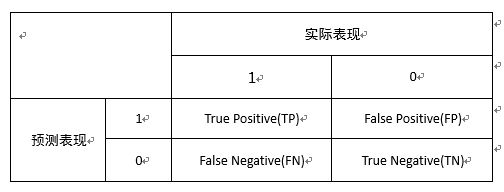

逻辑在于，你的预测是positive-1和negative-0，true和false描述你本次预测的对错

true positive-TP：预测为1，预测正确即实际1

false positive-FP：预测为1，预测错误即实际0

true negative-TN：预测为0，预测正确即实际0

false negative-FN：预测为0，预测错误即实际1



【混淆矩阵】

直观呈现以上四种情况的样本数



【准确率】accuracy

正确分类的样本/总样本：(TP+TN)/(ALL)

在不平衡分类问题中难以准确度量：比如98%的正样本只需全部预测为正即可获得98%准确率



【精确率】【查准率】precision

TP/(TP+FP)：在你预测为1的样本中实际为1的概率

查准率在检索系统中：检出的相关文献与检出的全部文献的百分比，衡量检索的信噪比



【召回率】【查全率】recall

TP/(TP+FN)：在实际为1的样本中你预测为1的概率

查全率在检索系统中：检出的相关文献与全部相关文献的百分比，衡量检索的覆盖率



实际的二分类中，positive-1标签可以代表健康也可以代表生病，但一般作为positive-1的指标指的是你更关注的样本表现，比如“是垃圾邮件”“是阳性肿瘤”“将要发生地震”。

因此在肿瘤判断和地震预测等场景：

要求模型有更高的【召回率】recall，是个地震你就都得给我揪出来不能放过

在垃圾邮件判断等场景：

要求模型有更高的【精确率】precision，你给我放进回收站里的可都得确定是垃圾，千万不能有正常邮件啊



【ROC】

常被用来评价一个二值分类器的优劣
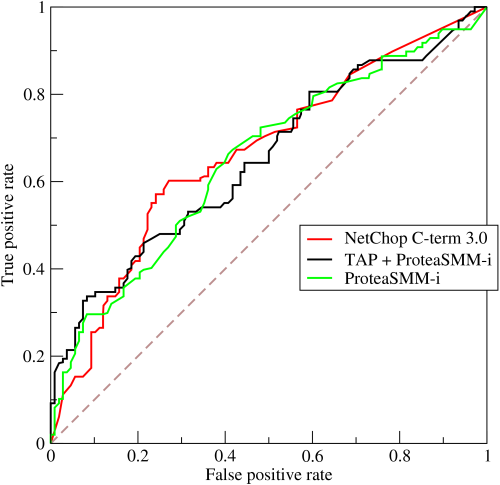

ROC曲线的横坐标为false positive rate（FPR）：FP/(FP+TN)

假阳性率，即实际无病，但根据筛检被判为有病的百分比。

在实际为0的样本中你预测为1的概率

纵坐标为true positive rate（TPR）：TP/(TP+FN)

真阳性率，即实际有病，但根据筛检被判为有病的百分比。

在实际为1的样本中你预测为1的概率，此处即【召回率】【查全率】recall



接下来我们考虑ROC曲线图中的四个点和一条线。

第一个点，(0,1)，即FPR=0,TPR=1，这意味着无病的没有被误判，有病的都全部检测到，这是一个完美的分类器，它将所有的样本都正确分类。

第二个点，(1,0)，即FPR=1，TPR=0，类似地分析可以发现这是一个最糟糕的分类器，因为它成功避开了所有的正确答案。

第三个点，(0,0)，即FPR=TPR=0，即FP（false positive）=TP（true positive）=0，没病的没有被误判但有病的全都没被检测到，即全部选0

类似的，第四个点（1,1），分类器实际上预测所有的样本都为1。

经过以上的分析可得到：ROC曲线越接近左上角，该分类器的性能越好。



【ROC是如何画出来的】

分类器有概率输出，50%常被作为阈值点，但基于不同的场景，可以通过控制概率输出的阈值来改变预测的标签，这样不同的阈值会得到不同的FPR和TPR。

从0%-100%之间选取任意细度的阈值分别获得FPR和TPR，对应在图中，得到的ROC曲线，阈值的细度控制了曲线的阶梯程度或平滑程度。

一个没有过拟合的二分类器的ROC应该是梯度均匀的，如图紫线
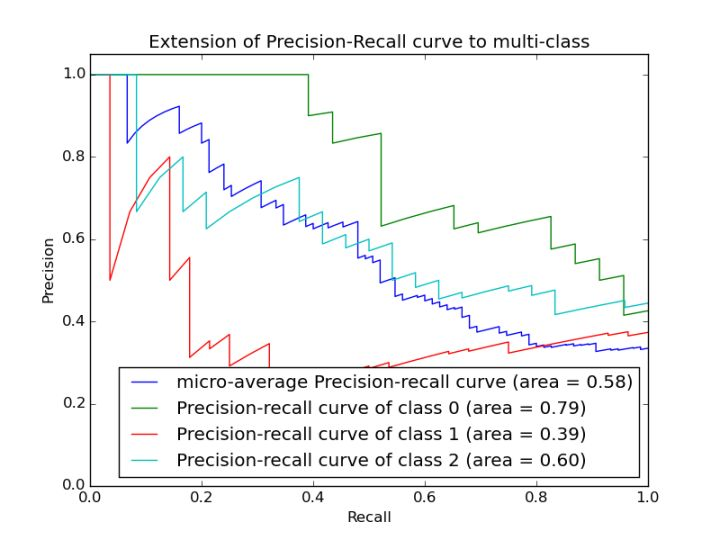

此图为PRC， precision recall curve，原理类似
ROC曲线有个很好的特性：当测试集中的正负样本的分布变化的时候，ROC曲线能够保持不变。而Precision-Recall曲线会变化剧烈，故ROC经常被使用。

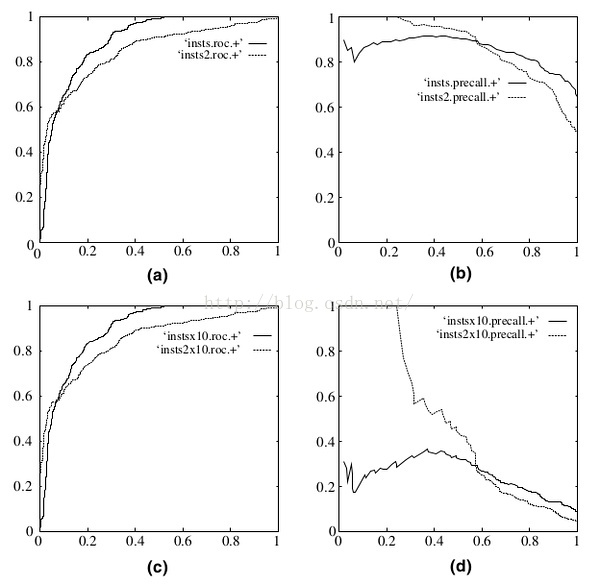


【AUC】

AUC（Area Under Curve）被定义为ROC曲线下的面积，完全随机的二分类器的AUC为0.5，虽然在不同的阈值下有不同的FPR和TPR，但相对面积更大，更靠近左上角的曲线代表着一个更加稳健的二分类器。

同时针对每一个分类器的ROC曲线，又能找到一个最佳的概率切分点使得自己关注的指标达到最佳水平。



【AUC的排序本质】

大部分分类器的输出是概率输出，如果要计算准确率，需要先把概率转化成类别，就需要手动设置一个阈值，而这个超参数的确定会对优化指标的计算产生过于敏感的影响

AUC从Mann–Whitney U statistic的角度来解释：随机从标签为1和标签为0的样本集中分别随机选择两个样本，同时分类器会输出两样本为1的概率，那么我们认为分类器对“标签1样本的预测概率>对标签0样本的预测概率 ”的概率等价于AUC。

因而AUC反应的是分类器对样本的排序能力，这样也可以理解AUC对不平衡样本不敏感的原因了。



【作为优化目标的各类指标】

最常用的分类器优化及评价指标是AUC和logloss，最主要的原因是：不同于accuracy，precision等，这两个指标不需要将概率输出转化为类别，而是可以直接使用概率进行计算。

顺便贴上logloss的公式

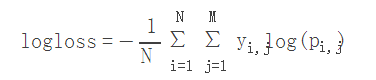
N：样本数
M：类别数，比如上面的多类别例子，M就为4
yij：第i个样本属于分类j时为为1，否则为0
pij：第i个样本被预测为第j类的概率


【F1】
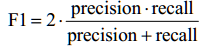

F1兼顾了分类模型的准确率和召回率，可以看作是模型准确率和召回率的调和平均数，最大值是1，最小值是0。



额外补充【AUC为优化目标的模型融合手段rank_avg】：

在拍拍贷风控比赛中，印象中一个前排队伍基于AUC的排序本质，使用rank_avg融合了最后的几个基础模型。

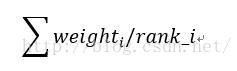
rank_avg这种融合方法适合排序评估指标，比如auc之类的

其中weight_i为该模型权重，权重为1表示平均融合

rank_i表示样本的升序排名 ，也就是越靠前的样本融合后也越靠前

能较快的利用排名融合多个模型之间的差异，而不用去加权样本的概率值融合



贴一段源码：

#三模型的概率输出
xgb_7844 = pd.read_csv('xgb_7844.csv')
svm_771 = pd.read_csv('svm_771.csv')
xgb_787 = pd.read_csv('xgb_787.csv')

#score概率变为排名
xgb_7844.score = xgb_7844.score.rank()
svm_771.score = svm_771.score.rank()
xgb_787.score = xgb_787.score.rank()

#排名加权融合的结果丧失了概率指义，但AUC的计算不用关系绝对大小，只关心相对大小
pred = 0.7*xgb_787.score + 0.2*xgb_7844.score + 0.1*svm_771.score

#AUC的计算
auc = int(roc_auc_score(val.target.values,pred.values)*10000)

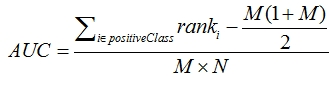
M为正类样本的数目，N为负类样本的数目，rank为分类器给出的排名。

可以发现整个计算过程中连直接的概率输出值都不需要，仅关心相对排名，所以只要保证submit的那一组输出的rank是有意义的即可，并不一定需要必须输出概率。

> 全面梳理：准确率,精确率,召回率,查准率,查全率,假阳性,真阳性,PRC,ROC,AUC,F1 - Theseus的文章 - 知乎 https://zhuanlan.zhihu.com/p/34079183

## Arranging machine learning projects

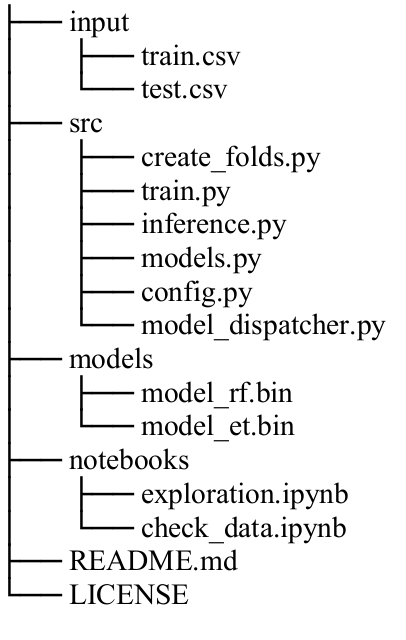

第一步： 通过查看label分布情况，确定评估指标 